In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
file=pd.read_csv("CSV FILES/heart-dissease.csv")
file


FileNotFoundError: [Errno 2] No such file or directory: 'CSV FILES/heart-dissease.csv'

In [10]:
x=file.drop(["target"],axis=1)

NameError: name 'file' is not defined

In [11]:
y=file["target"]

NameError: name 'file' is not defined

NameError: name 'file' is not defined

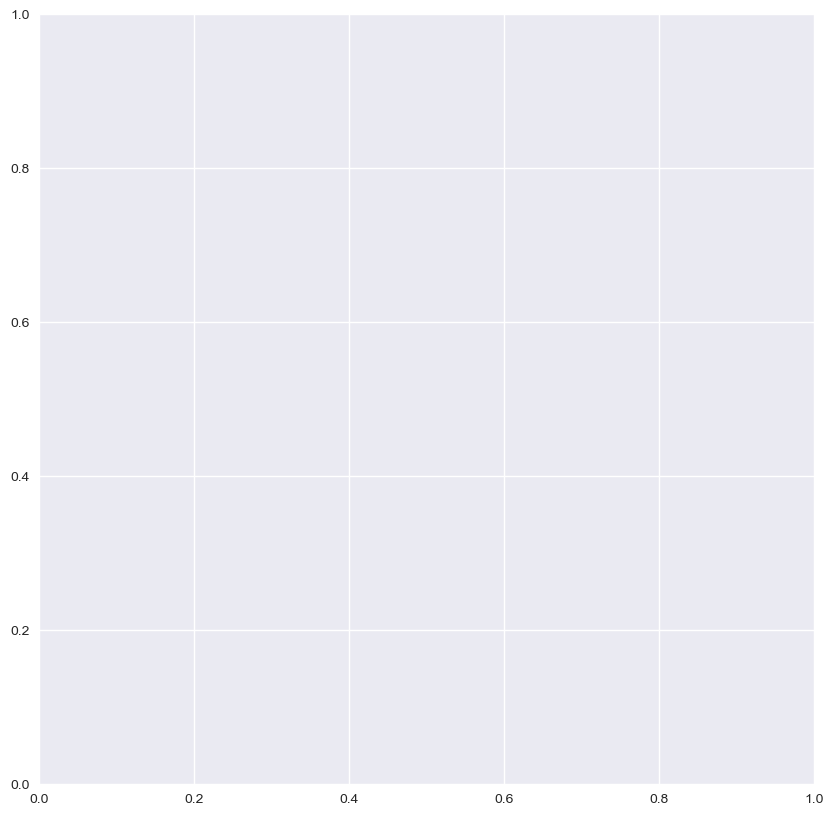

In [12]:
fig,ax1=plt.subplots(figsize=(10,10))
ax1.bar(file["age"],file["sex"])

plt.show()

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,
                          ncols=2,
                          figsize=(10,10),
                          )

ax1.scatter(file["trestbps"],file["chol"],color="red")
ax1.set(title="lauda lahsun",
       xlabel="trestbps",
       ylabel="CHOLESTROL")
ax1.legend()

ax2.scatter(file["thalach"],file["age"],color="blue")

plt.show()

NameError: name 'file' is not defined

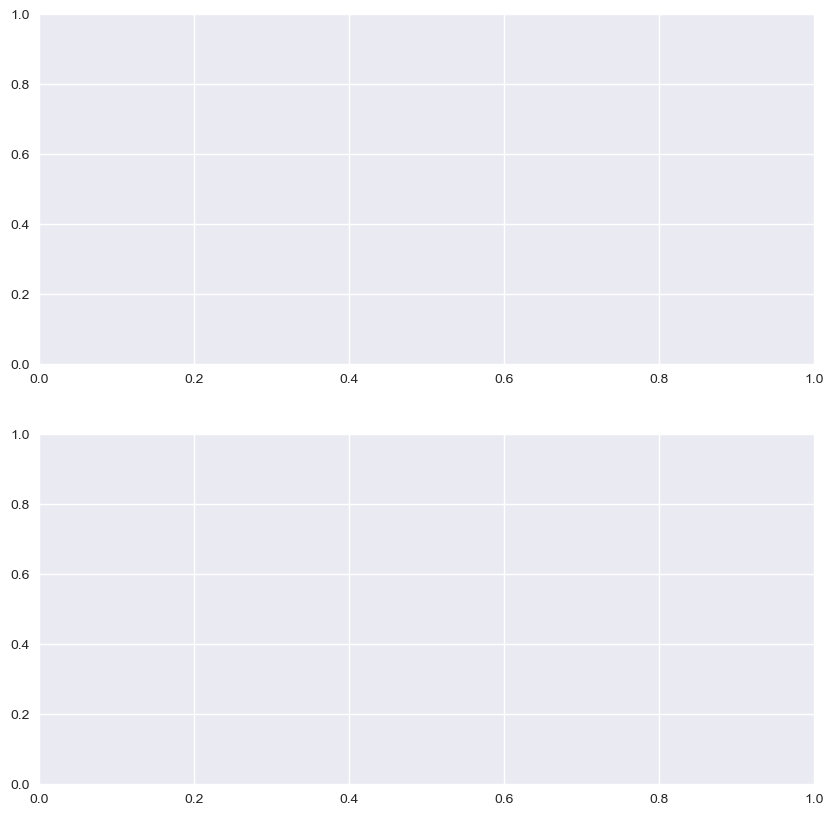

In [13]:
fig,(ax0,ax1)=plt.subplots(nrows=2,ncols=1,figsize=(10,10))

plt.style.use("seaborn-v0_8")
scatter=ax0.scatter(file["age"],file["chol"],cmap="winter",c=file["target"])
ax0.set(title="heart dissease model",
       xlabel='age',
       ylabel="cholestrol")

ax0.legend(*scatter.legend_elements(),title="Target")
ax0.axhline(file["chol"].mean(),c="b",linestyle="--")

ax1.scatter(file["age"],file["thalach"])
ax1.set(xlabel="age",ylabel="thalach")

plt.show();


In [14]:
data=pd.read_csv("CSV FILES/car-sales-extended.csv")

In [15]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [16]:
data.shape

(1000, 5)

In [17]:
data.info

<bound method DataFrame.info of        Make Colour  Odometer (KM)  Doors  Price
0     Honda  White          35431      4  15323
1       BMW   Blue         192714      5  19943
2     Honda  White          84714      4  28343
3    Toyota  White         154365      4  13434
4    Nissan   Blue         181577      3  14043
..      ...    ...            ...    ...    ...
995  Toyota  Black          35820      4  32042
996  Nissan  White         155144      3   5716
997  Nissan   Blue          66604      4  31570
998   Honda  White         215883      4   4001
999  Toyota   Blue         248360      4  12732

[1000 rows x 5 columns]>

In [18]:
data.describe

<bound method NDFrame.describe of        Make Colour  Odometer (KM)  Doors  Price
0     Honda  White          35431      4  15323
1       BMW   Blue         192714      5  19943
2     Honda  White          84714      4  28343
3    Toyota  White         154365      4  13434
4    Nissan   Blue         181577      3  14043
..      ...    ...            ...    ...    ...
995  Toyota  Black          35820      4  32042
996  Nissan  White         155144      3   5716
997  Nissan   Blue          66604      4  31570
998   Honda  White         215883      4   4001
999  Toyota   Blue         248360      4  12732

[1000 rows x 5 columns]>

In [19]:



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X=data.drop("Price",axis=1)
y=data["Price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

ValueError: could not convert string to float: 'Nissan'

In [20]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]

one_hot=OneHotEncoder()

transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                              remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
np.random.seed(23)
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.3)
model=RandomForestRegressor()

In [33]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
model.score(X_test,y_test)*100

31.68662282191741

In [41]:
dummy=pd.get_dummies(data[["Make","Colour","Doors"]])
dummy

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [46]:
np.random.seed(42)
X_train , X_test, y_train, y_test =train_test_split(dummy,y,test_size=0.2)

In [47]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
model.score(X_test,y_test)

0.2920788538619685

In [49]:
car_sales=pd.read_csv("CSV FILES/car-sales-extended-missing-data.csv")

In [50]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [60]:
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [61]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [62]:
X_train.head()

,Make,Colour,Odometer (KM),Doors
29,Toyota,White,112004.0,4.0
535,Toyota,White,35673.0,4.0
695,Toyota,White,146824.0,4.0
557,Honda,Black,45152.0,4.0
836,Nissan,Blue,69954.0,4.0


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]

one_hot=OneHotEncoder()

transformer=ColumnTransformer([("one_hot",one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X=transformer.fit_transform(X_train)

transformed_X
pd.DataFrame(transformed_X)

,0
0,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
2,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 1)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
...,...
795,"(0, 3)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
796,"(0, 1)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
797,"(0, 4)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
798,"(0, 1)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 


In [2]:
data=pd.read_csv("CSV FILES/heart-disease.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X=data.drop("target",axis=1)
y=data["target"]

In [11]:
X.head() 
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_predict , train_test_split
from sklearn.ensemble import 